# Vivarium: an interface and engine for integrative multiscale modeling in comptuational biology
Eran Agmon, PhD | Bioengineering, Stanford University | May 25, 2021

In [1]:
# #Uncomment to install vivarium-core
# %%capture
# !pip install vivarium-core==0.2.7

# Multi-paradigm Composites

## 1.1  Cobra FBA of _E. coli_ Metabolism

In this first example, a .BIG model is loaded into a Vivarium-Cobra process and simulated. The topology shows how a Process, cobra, is exposed via Stores so it can be linked to other Processes.

In [31]:
%matplotlib inline
from bioscrape_cobra.simulate import simulate_cobra
from bioscrape_cobra.plot import plot_metabolism, cobra_topology_config
from vivarium.plots.topology import plot_topology
from vivarium.plots.simulation_output import save_fig_to_dir

#Simulate Cobra
cobra_timeseries, cobra = simulate_cobra(total_time = 200)


Experiment ID: b1c363f0-af76-11eb-b806-acde48001122
Created: 05/07/2021 at 13:56:28
Completed in 0.626436 seconds


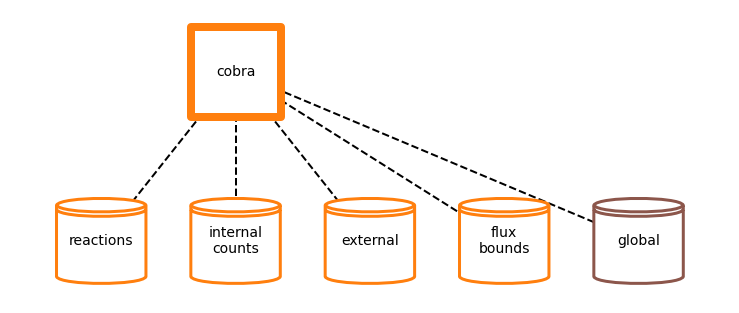

In [32]:
fig_topology = plot_topology(cobra, cobra_topology_config)

# 2. Simulating Chemical Reaction Network Models of the Lac Operon with Bioscrape

In [33]:
%matplotlib inline
from bioscrape_cobra.simulate import simulate_bioscrape
from vivarium.plots.simulation_output import save_fig_to_dir
from vivarium.plots.topology import plot_topology
from bioscrape_cobra.plot import plot_single, bioscrape_topology_config

#Simulate the Lac Operon CRN Deterministically
bioscrape_timeseries_det, bioscrape_composite_det = simulate_bioscrape(
    total_time = 20000, initial_glucose = 10, initial_lactose = 20)


Experiment ID: b2575e70-af76-11eb-b806-acde48001122
Created: 05/07/2021 at 13:56:29
Completed in 1.81 seconds


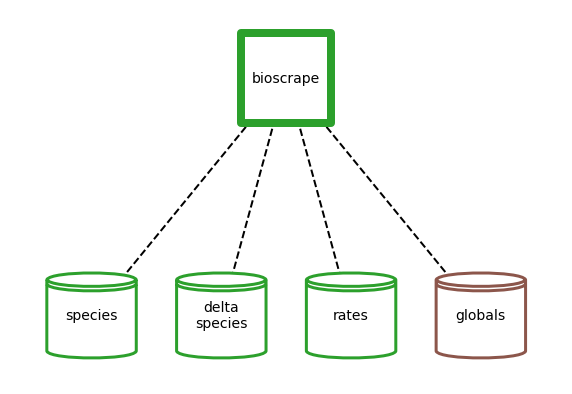

In [34]:
fig_topology = plot_topology(bioscrape_composite_det, bioscrape_topology_config)

## Lattice Environment

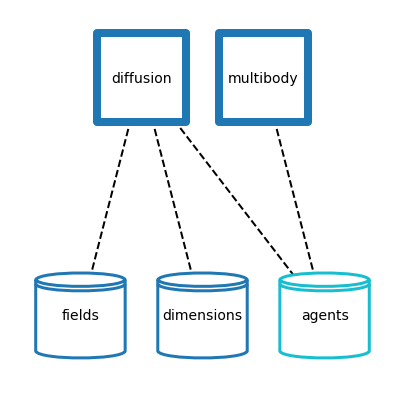

In [8]:
import numpy as np
from vivarium.plots.topology import plot_topology
from bioscrape_cobra.simulate import Lattice
from bioscrape_cobra.plot import config_lattice_topology

from vivarium_multibody.processes.multibody_physics import (
    test_growth_division,
    agent_body_config, 
    volume_from_length)
from vivarium_multibody.plots.snapshots import (
    plot_snapshots,
    format_snapshot_data,
    make_snapshots_figure,
    get_field_range,
    get_agent_colors)
from ipywidgets import interactive
import ipywidgets as widgets


lattice_composer = Lattice()
fig_topology = plot_topology(lattice_composer, config_lattice_topology)

## simulate Lattice

In [5]:
total_time = 150
n_agents = 3
spatial_bounds = [60, 60]

# configure
agent_ids = [str(agent_id) for agent_id in range(n_agents)]
body_config = {'bounds': spatial_bounds, 'agent_ids': agent_ids}
multibody_config = {'bounds': spatial_bounds}
multibody_config.update(agent_body_config(body_config))

# experiment settings
experiment_settings = {'progress_bar': False, 'display_info': False}

# run multibody with grow/divide agents
multibody_data = test_growth_division(
        config=multibody_config,
        growth_rate=0.05,
        growth_rate_noise=0.05,
        division_volume=volume_from_length(4,1),
        total_time=total_time,
        experiment_settings=experiment_settings)

multibody_agents, multibody_fields = format_snapshot_data(multibody_data)

# make the snapshot plot function
time_vec = list(multibody_agents.keys()) 

# get fields and agent colors
multibody_field_range = get_field_range(multibody_fields, time_vec)
multibody_agent_colors = get_agent_colors(multibody_agents)

time_index_range = len(time_vec) -1

In [9]:
def plot_single_snapshot(t_index):   
    time_indices = np.array([t_index])
    snapshot_time = [time_vec[t_index]]
    fig = make_snapshots_figure(
        time_indices=time_indices,
        snapshot_times=snapshot_time,
        agents=multibody_agents,
        agent_colors=multibody_agent_colors,
        fields=multibody_fields,
        field_range=multibody_field_range,
        n_snapshots=1,
        bounds=spatial_bounds,
        default_font_size=12,
        plot_width=7)

interactive_plot = interactive(
    plot_single_snapshot, 
    t_index=widgets.IntSlider(min=0, max=time_index_range, step=2, value=0))

In [10]:
interactive_plot

interactive(children=(IntSlider(value=0, description='t_index', max=150, step=2), Output()), _dom_classes=('wi…

# Integration

## 4.1 Bioscrape and COBRA in a Single Deterministic Cell

In [48]:
from bioscrape_cobra.bioscrape_cobra_deterministic import BioscrapeCOBRAdeterministic
from bioscrape_cobra.simulate import get_bioscrape_cobra_config, simulate_bioscrape_cobra, plot_variables_list_deterministic
from bioscrape_cobra.plot import plot_single, config_single_cell_bioscrape_cobra_topology
from vivarium.plots.topology import plot_topology

biocobra_data_det, comp0_det = simulate_bioscrape_cobra(
    initial_glucose=10, #mM
    initial_lactose=200, #mM
    total_time = 10000, 
    output_type='timeseries')

Initializing experiment deterministic_20210507.140437


/Users/eranagmon/.pyenv/versions/3.8.3/envs/notebooks/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Completed in 47.76 seconds


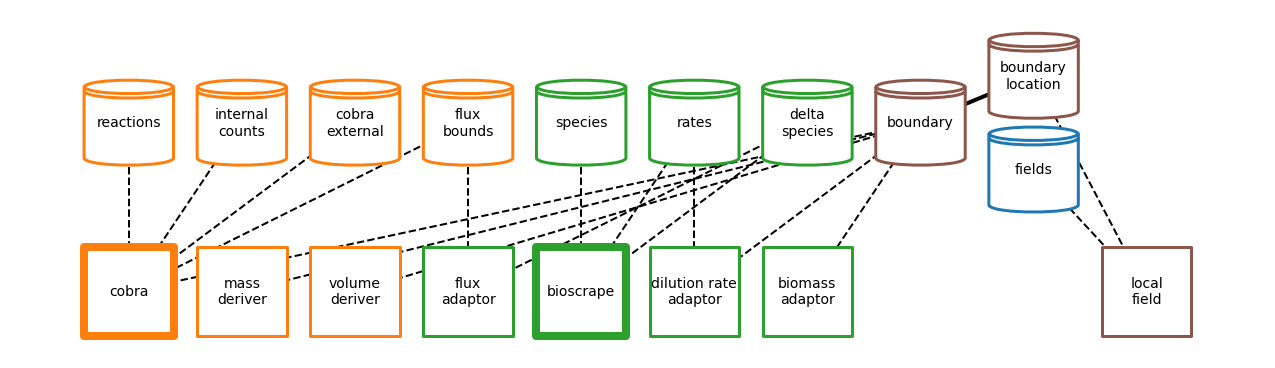

In [49]:
fig_topology = plot_topology(comp0_det, config_single_cell_bioscrape_cobra_topology)

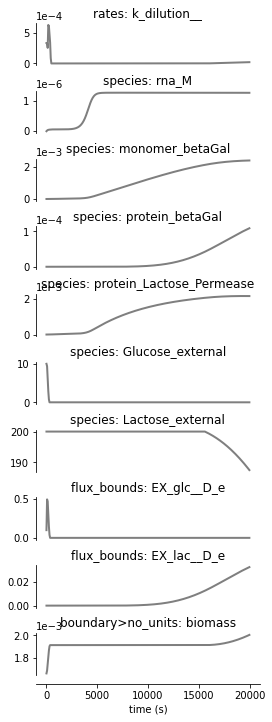

In [50]:
fig_data = plot_single(biocobra_data_det, variables = plot_variables_list_deterministic)

## 4.2 Bioscrape and COBRA in a Single Stochastic Cell

In [51]:
from bioscrape_cobra.bioscrape_cobra_stochastic import BioscrapeCOBRAstochastic
from bioscrape_cobra.simulate import get_bioscrape_cobra_config, simulate_bioscrape_cobra, plot_variables_list_stochastic
from bioscrape_cobra.plot import plot_single, config_single_cell_bioscrape_cobra_topology
from vivarium.plots.topology import plot_topology

#Simulate
biocobra_data_stoch, comp0_stoch = simulate_bioscrape_cobra(
    initial_glucose=10, #concentration
    initial_lactose=20, #concentration
    total_time = 10000, 
    output_type='timeseries',
    stochastic = True)

Initializing experiment stochastic_20210507.140659


/Users/eranagmon/.pyenv/versions/3.8.3/envs/notebooks/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Completed in 121.60 seconds


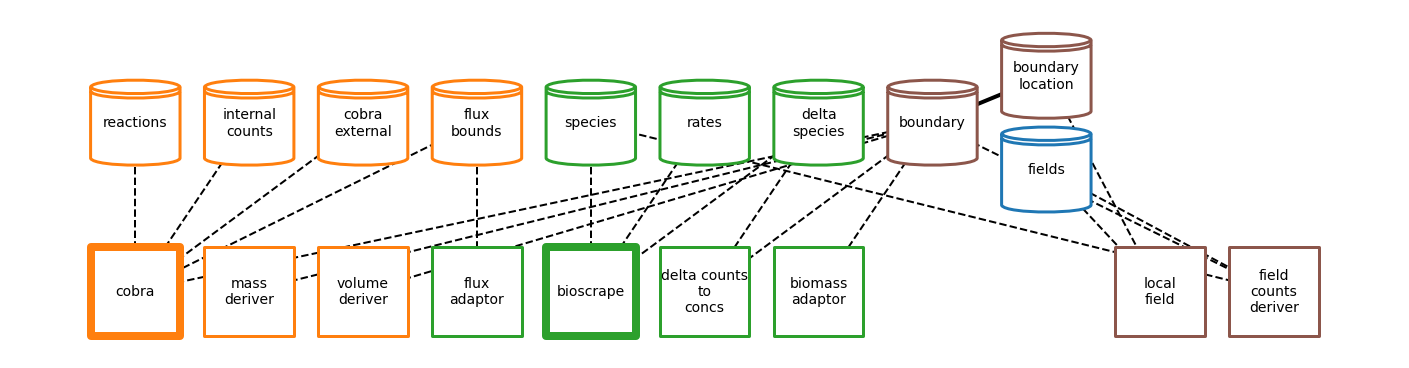

In [52]:
fig_topology = plot_topology(comp0_stoch, config_single_cell_bioscrape_cobra_topology)

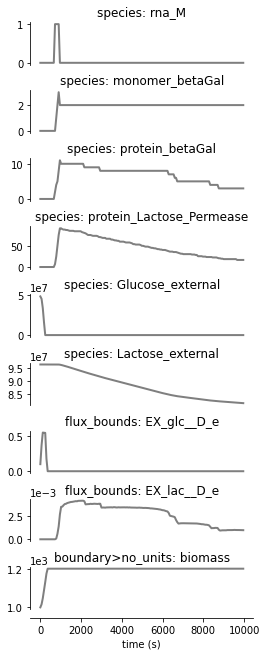

In [53]:
fig_data = plot_single(biocobra_data_stoch, variables = plot_variables_list_stochastic)